<a href="https://colab.research.google.com/github/sugiyama404/ReinfoceLearningForTrading/blob/main/make_data_analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
import copy

import seaborn as sns

drive.mount('/content/drive/')
exp_dir = 'Colab Notebooks/workspace/export/csv_data/'

random_path          = '/content/drive/My Drive/' + exp_dir + 'random_test.csv'
qlearning_path       = '/content/drive/My Drive/' + exp_dir + 'qlearning_test.csv'
sarsa_path           = '/content/drive/My Drive/' + exp_dir + 'sarsa_test.csv'
a2c_path             = '/content/drive/My Drive/' + exp_dir + 'a2c_test.csv'
a3c_path             = '/content/drive/My Drive/' + exp_dir + 'a3c_test.csv'
w_qlearning_path     = '/content/drive/My Drive/' + exp_dir + 'w_qlearning_test.csv'
dqn_path             = '/content/drive/My Drive/' + exp_dir + 'dqn_test.csv'
gorila_path          = '/content/drive/My Drive/' + exp_dir + 'gorila_test.csv'
ddqn_path            = '/content/drive/My Drive/' + exp_dir + 'ddqn_test.csv'
dn_dqn_path          = '/content/drive/My Drive/' + exp_dir + 'dn_dqn_test.csv'
per_dqn_path         = '/content/drive/My Drive/' + exp_dir + 'per_dqn_test.csv'
apex_path            = '/content/drive/My Drive/' + exp_dir + 'apex_test.csv'
ppo_path             = '/content/drive/My Drive/' + exp_dir + 'ppo_test.csv'
impala_path          = '/content/drive/My Drive/' + exp_dir + 'impala_test.csv'
drqn_path            = '/content/drive/My Drive/' + exp_dir + 'drqn_test.csv'
drqn_burnin_path     = '/content/drive/My Drive/' + exp_dir + 'drqn-burnin_test.csv'
drqn_sequential_path = '/content/drive/My Drive/' + exp_dir + 'drqn-sequential_test.csv'
r2d2_path            = '/content/drive/My Drive/' + exp_dir + 'r2d2_test.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
df_r = pd.read_csv(random_path)
df_q = pd.read_csv(qlearning_path)
df_s = pd.read_csv(sarsa_path)
df_a2c = pd.read_csv(a2c_path)
df_a3c = pd.read_csv(a3c_path)
df_wq = pd.read_csv(w_qlearning_path)
df_dqn = pd.read_csv(dqn_path)
df_gorila = pd.read_csv(gorila_path)
df_ddqn = pd.read_csv(ddqn_path)
df_dn_dqn = pd.read_csv(dn_dqn_path)
df_per_dqn = pd.read_csv(per_dqn_path)
df_apex = pd.read_csv(apex_path)
df_ppo = pd.read_csv(ppo_path)
df_impala = pd.read_csv(impala_path)
df_drqn = pd.read_csv(drqn_path)
df_drqn_burnin = pd.read_csv(drqn_burnin_path)
df_drqn_sequential = pd.read_csv(drqn_sequential_path)
df_r2d2 = pd.read_csv(r2d2_path)

df_r_1 = df_r
df_q_1 = df_q.drop("Unnamed: 0", axis=1)
df_s_1 = df_s.drop("Unnamed: 0", axis=1)
df_a2c_1 = df_a2c.drop("Unnamed: 0", axis=1)
df_a3c_1 = df_a3c
df_wq_1 = df_wq.drop("Unnamed: 0", axis=1)
df_dqn_1 = df_dqn
df_ddqn_1 = df_ddqn
df_dn_dqn_1 = df_dn_dqn
df_per_dqn_1 = df_per_dqn
df_apex_1 = df_apex
df_gorila_1 = df_gorila
df_ppo_1 = df_ppo
df_impala_1 = df_impala
df_drqn_1 = df_drqn
df_drqn_burnin_1 = df_drqn_burnin
df_drqn_sequential_1 = df_drqn_sequential
df_r2d2_1 = df_r2d2

df_r_1['WinRate'] = df_r_1['TradeWin'] / df_r_1['TradeTimes'] * 100
df_q_1['WinRate'] = df_q_1['TradeWin'] / df_q_1['TradeTimes'] * 100
df_s_1['WinRate'] = df_s_1['TradeWin'] / df_s_1['TradeTimes'] * 100
df_a2c_1['WinRate'] = df_a2c_1['TradeWin'] / df_a2c_1['TradeTimes'] * 100
df_a3c_1['WinRate'] = df_a3c_1['TradeWin'] / df_a3c_1['TradeTimes'] * 100
df_wq_1['WinRate'] = df_wq_1['TradeWin'] / df_wq_1['TradeTimes'] * 100
df_dqn_1['WinRate'] = df_dqn_1['TradeWin'] / df_dqn_1['TradeTimes'] * 100
df_ddqn_1['WinRate'] = df_ddqn_1['TradeWin'] / df_ddqn_1['TradeTimes'] * 100
df_dn_dqn_1['WinRate'] = df_dn_dqn_1['TradeWin'] / df_dn_dqn_1['TradeTimes'] * 100
df_per_dqn_1['WinRate'] = df_per_dqn_1['TradeWin'] / df_per_dqn_1['TradeTimes'] * 100
df_apex_1['WinRate'] = df_apex_1['TradeWin'] / df_apex_1['TradeTimes'] * 100
df_gorila_1['WinRate'] = df_gorila_1['TradeWin'] / df_gorila_1['TradeTimes'] * 100
df_ppo_1['WinRate'] = df_ppo_1['TradeWin'] / df_ppo_1['TradeTimes'] * 100
df_impala_1['WinRate'] = df_impala_1['TradeWin'] / df_impala_1['TradeTimes'] * 100
df_drqn_1['WinRate'] = df_drqn_1['TradeWin'] / df_drqn_1['TradeTimes'] * 100
df_drqn_burnin_1['WinRate'] = df_drqn_burnin_1['TradeWin'] / df_drqn_burnin_1['TradeTimes'] * 100
df_drqn_sequential_1['WinRate'] = df_drqn_sequential_1['TradeWin'] / df_drqn_sequential_1['TradeTimes'] * 100
df_r2d2_1['WinRate'] = df_r2d2_1['TradeWin'] / df_r2d2_1['TradeTimes'] * 100

df_r_1['WinRate'] = df_r_1['WinRate'].fillna(0)
df_q_1['WinRate'] = df_q_1['WinRate'].fillna(0)
df_s_1['WinRate'] = df_s_1['WinRate'].fillna(0)
df_a2c_1['WinRate'] = df_a2c_1['WinRate'].fillna(0)
df_a3c_1['WinRate'] = df_a3c_1['WinRate'].fillna(0)
df_wq_1['WinRate'] = df_wq_1['WinRate'].fillna(0)
df_dqn_1['WinRate'] = df_dqn_1['WinRate'].fillna(0)
df_ddqn_1['WinRate'] = df_ddqn_1['WinRate'].fillna(0)
df_dn_dqn_1['WinRate'] = df_dn_dqn_1['WinRate'].fillna(0)
df_per_dqn_1['WinRate'] = df_per_dqn_1['WinRate'].fillna(0)
df_apex_1['WinRate'] = df_apex_1['WinRate'].fillna(0)
df_gorila_1['WinRate'] = df_gorila_1['WinRate'].fillna(0)
df_ppo_1['WinRate'] = df_ppo_1['WinRate'].fillna(0)
df_impala_1['WinRate'] = df_impala_1['WinRate'].fillna(0)
df_drqn_1['WinRate'] = df_drqn_1['WinRate'].fillna(0)
df_drqn_burnin_1['WinRate'] = df_drqn_burnin_1['WinRate'].fillna(0)
df_drqn_sequential_1['WinRate'] = df_drqn_sequential_1['WinRate'].fillna(0)
df_r2d2_1['WinRate'] = df_r2d2_1['WinRate'].fillna(0)

df_r_1['WinRate'] = df_r_1['WinRate'].round(2)
df_q_1['WinRate'] = df_q_1['WinRate'].round(2)
df_s_1['WinRate'] = df_s_1['WinRate'].round(2)
df_a2c_1['WinRate'] = df_a2c_1['WinRate'].round(2)
df_a3c_1['WinRate'] = df_a3c_1['WinRate'].round(2)
df_wq_1['WinRate'] = df_wq_1['WinRate'].round(2)
df_dqn_1['WinRate'] = df_dqn_1['WinRate'].round(2)
df_ddqn_1['WinRate'] = df_ddqn_1['WinRate'].round(2)
df_dn_dqn_1['WinRate'] = df_dn_dqn_1['WinRate'].round(2)
df_per_dqn_1['WinRate'] = df_per_dqn_1['WinRate'].round(2)
df_apex_1['WinRate'] = df_apex_1['WinRate'].round(2)
df_gorila_1['WinRate'] = df_gorila_1['WinRate'].round(2)
df_ppo_1['WinRate'] = df_ppo_1['WinRate'].round(2)
df_impala_1['WinRate'] = df_impala_1['WinRate'].round(2)
df_drqn_1['WinRate'] = df_drqn_1['WinRate'].round(2)
df_drqn_burnin_1['WinRate'] = df_drqn_burnin_1['WinRate'].round(2)
df_drqn_sequential_1['WinRate'] = df_drqn_sequential_1['WinRate'].round(2)
df_r2d2_1['WinRate'] = df_r2d2_1['WinRate'].round(2)

df_r_1['FixedProfitRate'] = df_r_1['FixedProfit'] /1000000 * 100
df_q_1['FixedProfitRate'] = df_q_1['FixedProfit'] /1000000 * 100
df_s_1['FixedProfitRate'] = df_s_1['FixedProfit'] /1000000 * 100
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfit'] /1000000 * 100
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfit'] /1000000 * 100
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfit'] /1000000 * 100
df_dqn_1['FixedProfitRate'] = df_dqn_1['FixedProfit'] /1000000 * 100
df_ddqn_1['FixedProfitRate'] = df_ddqn_1['FixedProfit'] /1000000 * 100
df_dn_dqn_1['FixedProfitRate'] = df_dn_dqn_1['FixedProfit'] /1000000 * 100
df_per_dqn_1['FixedProfitRate'] = df_per_dqn_1['FixedProfit'] /1000000 * 100
df_apex_1['FixedProfitRate'] = df_apex_1['FixedProfit'] /1000000 * 100
df_gorila_1['FixedProfitRate'] = df_gorila_1['FixedProfit'] /1000000 * 100
df_ppo_1['FixedProfitRate'] = df_ppo_1['FixedProfit'] /1000000 * 100
df_impala_1['FixedProfitRate'] = df_impala_1['FixedProfit'] /1000000 * 100
df_drqn_1['FixedProfitRate'] = df_drqn_1['FixedProfit'] /1000000 * 100
df_drqn_burnin_1['FixedProfitRate'] = df_drqn_burnin_1['FixedProfit'] /1000000 * 100
df_drqn_sequential_1['FixedProfitRate'] = df_drqn_sequential_1['FixedProfit'] /1000000 * 100
df_r2d2_1['FixedProfitRate'] = df_r2d2_1['FixedProfit'] /1000000 * 100

df_r_1['FixedProfitRate'] = df_r_1['FixedProfitRate'].fillna(0)
df_q_1['FixedProfitRate'] = df_q_1['FixedProfitRate'].fillna(0)
df_s_1['FixedProfitRate'] = df_s_1['FixedProfitRate'].fillna(0)
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfitRate'].fillna(0)
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfitRate'].fillna(0)
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfitRate'].fillna(0)
df_dqn_1['FixedProfitRate'] = df_dqn_1['FixedProfitRate'].fillna(0)
df_ddqn_1['FixedProfitRate'] = df_ddqn_1['FixedProfitRate'].fillna(0)
df_dn_dqn_1['FixedProfitRate'] = df_dn_dqn_1['FixedProfitRate'].fillna(0)
df_per_dqn_1['FixedProfitRate'] = df_per_dqn_1['FixedProfitRate'].fillna(0)
df_apex_1['FixedProfitRate'] = df_apex_1['FixedProfitRate'].fillna(0)
df_gorila_1['FixedProfitRate'] = df_gorila_1['FixedProfitRate'].fillna(0)
df_ppo_1['FixedProfitRate'] = df_ppo_1['FixedProfitRate'].fillna(0)
df_impala_1['FixedProfitRate'] = df_impala_1['FixedProfitRate'].fillna(0)
df_drqn_1['FixedProfitRate'] = df_drqn_1['FixedProfitRate'].fillna(0)
df_drqn_burnin_1['FixedProfitRate'] = df_drqn_burnin_1['FixedProfitRate'].fillna(0)
df_drqn_sequential_1['FixedProfitRate'] = df_drqn_sequential_1['FixedProfitRate'].fillna(0)
df_r2d2_1['FixedProfitRate'] = df_r2d2_1['FixedProfitRate'].fillna(0)

df_r_1['FixedProfitRate'] = df_r_1['FixedProfitRate'].round(2)
df_q_1['FixedProfitRate'] = df_q_1['FixedProfitRate'].round(2)
df_s_1['FixedProfitRate'] = df_s_1['FixedProfitRate'].round(2)
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfitRate'].round(2)
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfitRate'].round(2)
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfitRate'].round(2)
df_dqn_1['FixedProfitRate'] = df_dqn_1['FixedProfitRate'].round(2)
df_ddqn_1['FixedProfitRate'] = df_ddqn_1['FixedProfitRate'].round(2)
df_dn_dqn_1['FixedProfitRate'] = df_dn_dqn_1['FixedProfitRate'].round(2)
df_per_dqn_1['FixedProfitRate'] = df_per_dqn_1['FixedProfitRate'].round(2)
df_apex_1['FixedProfitRate'] = df_apex_1['FixedProfitRate'].round(2)
df_gorila_1['FixedProfitRate'] = df_gorila_1['FixedProfitRate'].round(2)
df_ppo_1['FixedProfitRate'] = df_ppo_1['FixedProfitRate'].round(2)
df_impala_1['FixedProfitRate'] = df_impala_1['FixedProfitRate'].round(2)
df_drqn_1['FixedProfitRate'] = df_drqn_1['FixedProfitRate'].round(2)
df_drqn_burnin_1['FixedProfitRate'] = df_drqn_burnin_1['FixedProfitRate'].round(2)
df_drqn_sequential_1['FixedProfitRate'] = df_drqn_sequential_1['FixedProfitRate'].round(2)
df_r2d2_1['FixedProfitRate'] = df_r2d2_1['FixedProfitRate'].round(2)

del df_r_1['FixedProfit']
del df_r_1['TradeTimes']
del df_r_1['TradeWin']
del df_q_1['FixedProfit']
del df_q_1['TradeTimes']
del df_q_1['TradeWin']
del df_s_1['FixedProfit']
del df_s_1['TradeTimes']
del df_s_1['TradeWin']
del df_a2c_1['FixedProfit']
del df_a2c_1['TradeTimes']
del df_a2c_1['TradeWin']
del df_a3c_1['FixedProfit']
del df_a3c_1['TradeTimes']
del df_a3c_1['TradeWin']
del df_wq_1['FixedProfit']
del df_wq_1['TradeTimes']
del df_wq_1['TradeWin']
del df_dqn_1['FixedProfit']
del df_dqn_1['TradeTimes']
del df_dqn_1['TradeWin']
del df_ddqn_1['FixedProfit']
del df_ddqn_1['TradeTimes']
del df_ddqn_1['TradeWin']
del df_dn_dqn_1['FixedProfit']
del df_dn_dqn_1['TradeTimes']
del df_dn_dqn_1['TradeWin']
del df_per_dqn_1['FixedProfit']
del df_per_dqn_1['TradeTimes']
del df_per_dqn_1['TradeWin']
del df_apex_1['FixedProfit']
del df_apex_1['TradeTimes']
del df_apex_1['TradeWin']
del df_gorila_1['FixedProfit']
del df_gorila_1['TradeTimes']
del df_gorila_1['TradeWin']
del df_ppo_1['FixedProfit']
del df_ppo_1['TradeTimes']
del df_ppo_1['TradeWin']
del df_impala_1['FixedProfit']
del df_impala_1['TradeTimes']
del df_impala_1['TradeWin']
del df_drqn_1['FixedProfit']
del df_drqn_1['TradeTimes']
del df_drqn_1['TradeWin']
del df_drqn_burnin_1['FixedProfit']
del df_drqn_burnin_1['TradeTimes']
del df_drqn_burnin_1['TradeWin']
del df_drqn_sequential_1['FixedProfit']
del df_drqn_sequential_1['TradeTimes']
del df_drqn_sequential_1['TradeWin']
del df_r2d2_1['FixedProfit']
del df_r2d2_1['TradeTimes']
del df_r2d2_1['TradeWin']
df_impala_1

,WinRate,FixedProfitRate
0,56.69,107.61
1,57.43,120.28
2,62.04,149.25
3,67.18,159.41
4,55.17,131.37
...,...,...
95,67.57,127.65
96,61.36,120.43
97,60.42,124.34
98,61.22,144.79


In [9]:
df_a = pd.DataFrame(columns=['random', 'qlearning', 'sarsa', 'a2c', 'a3c','w_qlearning','dqn','ddqn','dn_dqn','per_dqn','gorila','ppo','impala'])
df_a['random'] = df_r_1['FixedProfitRate']
df_a['qlearning'] = df_q_1['FixedProfitRate']
df_a['sarsa'] = df_s_1['FixedProfitRate']
df_a['a2c'] = df_a2c_1['FixedProfitRate']
df_a['a3c'] = df_a3c_1['FixedProfitRate']
df_a['w_qlearning'] = df_wq_1['FixedProfitRate']
df_a['dqn'] = df_dqn_1['FixedProfitRate']
df_a['ddqn'] = df_ddqn_1['FixedProfitRate']
df_a['dn_dqn'] = df_dn_dqn_1['FixedProfitRate']
df_a['per_dqn'] = df_per_dqn_1['FixedProfitRate']
df_a['gorila'] = df_gorila_1['FixedProfitRate']
df_a['ppo'] = df_ppo_1['FixedProfitRate']
df_a['impala'] = df_impala_1['FixedProfitRate']

# second
df_a2 = pd.DataFrame(columns=['random','apex','drqn','drqn_burnin','drqn_seq','r2d2'])
df_a2['random'] = df_r_1['FixedProfitRate']
df_a2['apex'] = df_apex_1['FixedProfitRate']

df_a2['drqn'] = df_drqn_1['FixedProfitRate']
df_a2['drqn_burnin'] = df_drqn_burnin_1['FixedProfitRate']
df_a2['drqn_seq'] = df_drqn_sequential_1['FixedProfitRate']
df_a2['r2d2'] = df_r2d2_1['FixedProfitRate']



df_b = pd.DataFrame(columns=['random', 'qlearning', 'sarsa', 'a2c', 'a3c','w_qlearning','dqn','ddqn','dn_dqn','per_dqn','gorila','ppo','impala'])
df_b['random'] = df_r_1['WinRate']
df_b['qlearning'] = df_q_1['WinRate']
df_b['sarsa'] = df_s_1['WinRate']
df_b['a2c'] = df_a2c_1['WinRate']
df_b['a3c'] = df_a3c_1['WinRate']
df_b['w_qlearning'] = df_wq_1['WinRate']
df_b['dqn'] = df_dqn_1['WinRate']
df_b['ddqn'] = df_ddqn_1['WinRate']
df_b['dn_dqn'] = df_dn_dqn_1['WinRate']
df_b['per_dqn'] = df_per_dqn_1['WinRate']
df_b['gorila'] = df_gorila_1['WinRate']
df_b['ppo'] = df_ppo_1['WinRate']
df_b['impala'] = df_impala_1['WinRate']

# second
df_b2 = pd.DataFrame(columns=['random','apex','drqn','drqn_burnin','drqn_seq','r2d2'])
df_b2['random'] = df_r_1['WinRate']
df_b2['apex'] = df_apex_1['WinRate']

df_b2['drqn'] = df_drqn_1['WinRate']
df_b2['drqn_burnin'] = df_drqn_burnin_1['WinRate']
df_b2['drqn_seq'] = df_drqn_sequential_1['WinRate']
df_b2['r2d2'] = df_r2d2_1['WinRate']



dfTa_melt = pd.melt(df_a)
dfTa_melt['species'] = 'FixedProfitRate'

dfAt_melt = pd.melt(df_b)
dfAt_melt['species'] = 'WinRate'

dfTa_melt2 = pd.melt(df_a2)
dfTa_melt2['species'] = 'FixedProfitRate'

dfAt_melt2 = pd.melt(df_b2)
dfAt_melt2['species'] = 'WinRate'


df = pd.concat([dfAt_melt, dfTa_melt], axis=0)
df2 = pd.concat([dfAt_melt2, dfTa_melt2], axis=0)
df2

,variable,value,species
0,random,64.34,WinRate
1,random,59.31,WinRate
2,random,61.36,WinRate
3,random,60.00,WinRate
4,random,59.86,WinRate
...,...,...,...
595,r2d2,164.03,FixedProfitRate
596,r2d2,206.26,FixedProfitRate
597,r2d2,226.63,FixedProfitRate
598,r2d2,128.34,FixedProfitRate


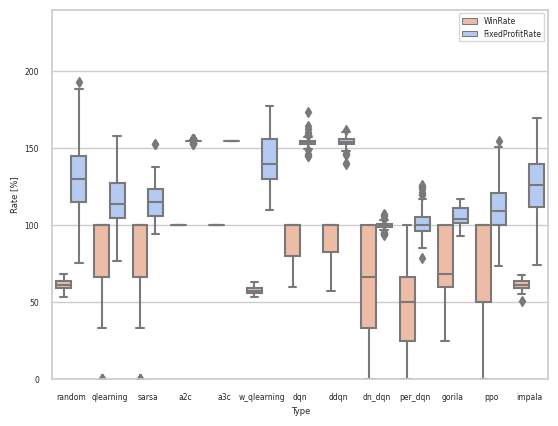

In [10]:
plt.style.use('default')
sns.set(font_scale = 0.5)
sns.set_style('whitegrid')
sns.set_palette('Set3')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='variable', y='value', data=df, hue='species', palette='coolwarm_r', ax=ax)


ax.set_xlabel('Type')
ax.set_ylabel('Rate [%]')
ax.set_ylim(0, 240)
ax.legend()

plt.show()

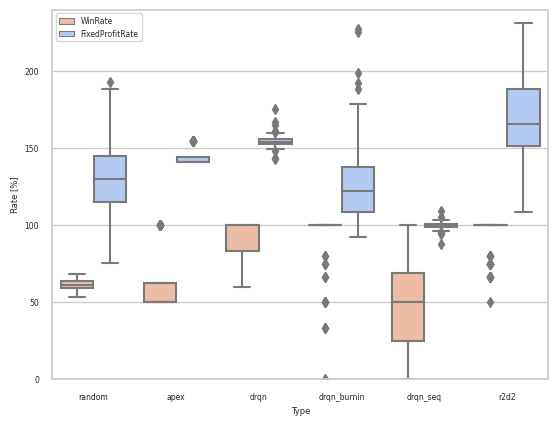

In [11]:
plt.style.use('default')
sns.set(font_scale = 0.5)
sns.set_style('whitegrid')
sns.set_palette('Set3')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
sns.boxplot(x='variable', y='value', data=df2, hue='species', palette='coolwarm_r', ax=ax2)

ax2.set_xlabel('Type')
ax2.set_ylabel('Rate [%]')
ax2.set_ylim(0, 240)
ax2.legend()

plt.show()